# IEEE Task : Cleaning (Candy Data)
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
<li><a href="#EDA">EDA</a></li>  
<li><a href="#visualization">visualization</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
* The data set have many columns ,I will describe the each column purpose :
* Internal_ID : it is a user id which is should be uniqe for each user
* Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present 

# 1-Frist,Importing important packges and importing the data excel file 

In [660]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [661]:
import numpy as np # this packege for mathmatical functions and arrays
import pandas as pd # this packege for data manipulation and analysis
import matplotlib.pyplot as plt # this packege for data visualization

data = pd.read_excel(r"C:\Users\maham\Desktop\candyhierarchy2017.xlsx") # i used read_excel beacuse the data is in excel file
data.head() # to show the first 5 rows of the data


,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

* Frist, i will show the size of our data 

In [662]:
print(data.shape) # to show the number of rows and columns in the data

(2460, 120)


* Second, i will show the names of columns 

In [663]:
print(data.columns) # to show the columns names in the data

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)


* Thired, i will show the number of missing values in each column

In [664]:
print(data.isnull().sum()) # to show the number of missing values in each column

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64


* Finally, i will show the data type of each column

In [665]:
print(data.dtypes) # to show the data types of each column

Internal ID                   int64
Q1: GOING OUT?               object
Q2: GENDER                   object
Q3: AGE                      object
Q4: COUNTRY                  object
                             ...   
Q12: MEDIA [Daily Dish]     float64
Q12: MEDIA [Science]        float64
Q12: MEDIA [ESPN]           float64
Q12: MEDIA [Yahoo]          float64
Click Coordinates (x, y)     object
Length: 120, dtype: object


### summry : there is wrong data type in age column , there is wrong range in age column and there is a missing value in many columns

# Cleaning

### before remove the (Internal ID) column we can use this column to remove the duplicated rows 
* Duplicated values can happen because many cases like : human errors in collcting data or servers errors

In [666]:
duplicate_ID = data.duplicated(subset='Internal ID') # to show the duplicated rows in the data
print(duplicate_ID.sum()) # to show the number of duplicated rows in the data

0


* So , there is no duplicated values Then we will remove the columns that we don't need like('Internal ID','Q7: JOY OTHER','Q8: DESPAIR OTHER','Q9: OTHER COMMENTS','Q12: MEDIA [Daily Dish]	Q12: MEDIA [Science]	Q12: MEDIA [ESPN]	Q12: MEDIA [Yahoo],'Click Coordinates (x, y)'
)

In [667]:
rem_col = ['Internal ID','Q7: JOY OTHER','Q8: DESPAIR OTHER','Q9: OTHER COMMENTS','Q12: MEDIA [Daily Dish]','Unnamed: 113','Q12: MEDIA [Science]','Q12: MEDIA [ESPN]','Q12: MEDIA [Yahoo]','Click Coordinates (x, y)']
data.drop(rem_col, axis=1, inplace=True) # to remove the unnecessary columns from the data
print(data.columns) # to show the columns names after removing the unnecessary columns

Index(['Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q6 | Trail Mix', 'Q6 | Twix',
       'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties',
       'Q10: DRESS', 'Q11: DAY'],
      dtype='object', length=110)


* After removing the unnecessary columns , i need to change name for some of them 

* I will use the new names of columns like the names in notebook template 

In [668]:
data.rename(columns={'Q1: GOING OUT?':'going out','Q2: GENDER':'gender','Q3: AGE':'age','Q4: COUNTRY':'country','Q5: STATE, PROVINCE, COUNTY, ETC':'area','Q10: DRESS':'dress','Q11: DAY':'day'},inplace=True) # to rename the columns names

In [669]:
print(data.columns) # to show the columns names after renaming the columns

Index(['going out', 'gender', 'age', 'country', 'area', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q6 | Trail Mix', 'Q6 | Twix',
       'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties', 'dress',
       'day'],
      dtype='object', length=110)


### Filling the missing values step
> After what we do this step for fill the missing values with suitable way

### 1- i think it is good way to fill the missing values in 'going out' column with the most frequent value in the column 

In [670]:
mode_value = data['going out'].mode() # to show the most frequent value in the column 'going out' we will use .mode() 
print(mode_value) # to show the most frequent value in the column 'going out' we will use .mode() 

0    No
Name: going out, dtype: object


In [671]:
data.fillna({'going out':'No'}, inplace=True) # to fill the missing values in the column 'going out' with the most frequent value
print(data['going out'].isnull().sum()) # to show the number of missing values in the column 'going out'

0


### 2- i think in 'gender' column is good way to fill the missing values with 'I'd rather not say' by logic way

In [672]:
data.fillna({'gender':"I'd rather not say"}, inplace=True) 
print(data['gender'].isnull().sum()) # to show the number of missing values


0


### 3- In 'age' column we will do :
* a - convert type from 'object' to 'numeric' value
* b - remove outliers
* c - fill the missing values with mean 

> a - convert type from 'object' to 'numeric' value

In [673]:
# to conver the data type from object to numric i will use the to_numric() function (I was not know the info but i read it in template and now i know it 'Thanks for the info')
data['age'] = pd.to_numeric(data['age'], errors='coerce') # to convert the data type from object to numric in the column 'age' (errors='coerce')it will replace all non-numeric values with NaNs)

print(data['age'].dtypes) # to show the data type of the column 'age'

float64


> b - remove outliers

In [674]:
# to calculate the outliers in the column 'age' i will use the quantile() function
q1 = data['age'].quantile(0.25) # to calculate the first quartile
q3 = data['age'].quantile(0.75) # to calculate the third quartile
iqr = q3 - q1 # to calculate the IQR
low = q1 - 1.5 * iqr # to calculate the lower number
high = q3 + 1.5 * iqr # to calculate the higher number
data = data[(data['age'] > low) & (data['age'] < high)] # to remove the outliers
print(data.shape) # to show the number of rows and columns after removing the outliers

(2321, 110)


* we notice the rows decrese from 2460 to 2321 after removing the outliers

> c - fill the missing values with mean

In [675]:
data.fillna({'age':data['age'].mean()}, inplace=True) # to fill the missing values in the column 'age' with the mean value
print(data['age'].isnull().sum()) # to show the number of missing values in the column 'age'

0


In [676]:
data['age'] = data['age'].astype(int) # to convert the data type from float to int in the column 'age'
print(data['age'].dtypes) # to show the data type of the column 'age'

int32


### 4- In 'country' column we will replace some values and fill the missing values by 'mode' way

* Frist i will review the values in 'country' column

In [677]:
print(data['country'].value_counts()) # to show the number of each country in the column 'country'

country
USA                            682
United States                  487
usa                            205
Canada                         172
Usa                            135
                              ... 
France                           1
Pittsburgh                       1
usas                             1
USA? Hard to tell anymore..      1
I don't know anymore             1
Name: count, Length: 112, dtype: int64


* we notice there is many values for the same value but in anthor format  (I can't use Fuzzywuzzy because I have a problem with undrsand it )

In [678]:
data['country'] = data['country'].str.strip() # to remove the spaces at the strat and end of the value
data['country'] = data['country'].str.upper() # to convert all values to upper case

# create a list for some values that have the same meaning
usa_list = ['USA','UNITED STATE','UNITES STATES','USSA','NORTH CAROLINA ','United States','usa','Usa','United States','United states','USAS','MURICA','UNITE STATES','USAA',
            'UNITED STSTES','United States of America','us','united states','UNITED STATED',"'MERICA",'THE UNITED STATES','USAUSAUSA','NORTH CAROLINA','THE UNITED STATES OF AMERICA','CALIFORNIA',
            'I PRETEND TO BE FROM CANADA, BUT I AM REALLY FROM THE UNITED STATES.','MERICA','MERICA ','USA? HARD TO TELL ANYMORE..','US OF A','U S','N. AMERICA','NEW JERSEY','UNITED STATEA','UNITED STAES',
            'U S A','AHEM....AMERCA','USA USA USA!!!!','UNITED STATSS','UNITED SATES','USA ', 'UNITED STATES OF AMERICA', 'UNITED STATES', 'US',
             'NEW YORK','USA! USA! USA!','UNIED STATES','UNHINGED STATES', 'AMERICA', 'U.S.A.', 'U.S.', 'UNITED STATES ', 'UNITED STATES OF AMERICA ']
UK_list = ['UK','IRELAND','U.K.' ,'UNITED KINGDOM','ENDLAND' ,'ENGLAND']
canda_list = ['CANADA', 'CAN', 'CANADA ','CANAE' ,'CANADA`','CANADA', 'CANADA','CANADA EH']
netherland_list = ['NETHERLANDS','HOLLAND','THE NETHERLANDS']

# create a list for nan values that we will remove it and trat it like missing values
nan_list = ["I DON'T KNOW ANYMORE'",'CASCADIA','SUBSCRIBE TO DM4UZ3 ON YOUTUBE','ATLANTIS','A',"I DON'T KNOW ANYMORE",'MY COUNTRY IS OF THEE','MURRIKA','NARNIA','TRUMPISTAN','INSANITY LATELY','EARTH','FEAR AND LOATHING']
data['country'].replace(usa_list,'USA',inplace=True) # to replace the values in the list 'usa_list' with 'USA'
data['country'].replace(UK_list,'UK',inplace=True) # to replace the values in the list 'UK_list' with 'UK'
data['country'].replace(canda_list,'CANADA',inplace=True) # to replace the values in the list 'canda_list' with 'CANADA'
data['country'].replace(nan_list,np.nan,inplace=True) # to replace the values in the list 'nan_list' with 'nan'
data['country'].replace(netherland_list,'NETHERLANDS',inplace=True) # to replace the values in the list 'netherland_list' with 'NETHERLANDS'

# remove unwanted values
data['country'].replace(nan_list,"",inplace=True) # to replace the values in the list 'nan_list' with 'nan'

# review the values after cleaning
print(data['country'].value_counts()) # to show the number of each country in the column 'country'


country
USA                   1989
CANADA                 219
UK                      38
GERMANY                 10
NETHERLANDS              7
AUSTRALIA                6
JAPAN                    5
SCOTLAND                 5
MEXICO                   4
FRANCE                   3
SWITZERLAND              3
HONG KONG                2
CHINA                    2
DENMARK                  2
SWEDEN                   2
KOREA                    1
ICELAND                  1
PITTSBURGH               1
GREECE                   1
COSTA RICA               1
UD                       1
SOUTH KOREA              1
INDONESIA                1
SOVIET CANUCKISTAN       1
SINGAPORE                1
FINLAND                  1
TAIWAN                   1
UAE                      1
SPAIN                    1
SOUTH AFRICA             1
Name: count, dtype: int64


* show number of missing values

In [679]:
print(data['country'].isnull().sum()) # to show the number of missing values in the column 'country'

9


* i will fill the missing value with mode way

In [680]:
print(data['country'].mode())

0    USA
Name: country, dtype: object


In [681]:
data.fillna({'country':'USA'}, inplace=True) # to fill the missing values in the column 'country' with the most frequent value
print(data['country'].isnull().sum()) # to show the number of missing values in the column 'country'

0


* i will show the uniqe values in 'area' coulmn

In [682]:
print(data['area'].unique()) # to show the unique values in the column 'area'

['NM' 'Virginia' 'or' 'exton pa' 'Colorado ' 'ontario' 'Ontario' 'Wa' nan
 'Quebec' 'NY' 'California' 'Texas' 'NEW YORK' 'CO' 'IN' 'MN'
 'aberdeenshire' 'Alberta' 'Wisconsin, 53705' 'RI' 'NC' 'Scotland'
 'minnesota' 'Michigan' 'Florida' 'New Jersey' 'VA' 'Colorado'
 'Los Angeles, California' 'CA' 'New York ' 'Chicago, Illinois' 'Nj'
 'Wisconsin' 'Minnesota ' 'London' 'mn' 'TEXAS' 'Illinois'
 'District of Columbia' 'Washington' 'Massachusetts ' 'OR' 'Montana'
 'New York' 'massachusetts' 'Abu Dhabi' 'TX' 'Arizona' 'Dc' 'yukon'
 'Pennsylvania ' 'MD' 'Ohio' 'Alberta ' 'OXFORDSHIRE' 'DC' 'Iowa' 'Mn'
 'TN' 'BC' 'Maryland' 'MI' 'Wisconsin ' 'alaska' 'Ny'
 'Colorado, Jefferson county ' 'Louisiana' 'pa' 'CO, Larimer County'
 'Nebraska ' 'Oregon' 'UT' 'ny' 'Pennsylvania' 'CDMX' 'north carolina'
 'Tennessee ' 'Texas ' 'Knox county, Tennessee' 'New Mexico' 'Maine'
 'maine' 'Virginia, Arlington' 'WA' 'MO' 'Illinois ' 'Mi' 'MA' 'Alaska'
 'New York, NY' 'Il' 'PA' 'New Hampshire ' 'Washington ' 'Massa

> fixing the 'area' column will be hard and not useful so i will drop it

In [683]:
data.drop('area', axis=1, inplace=True) # to remove the column 'area' from the data
print(data.columns) # to show the columns names after removing the column 'area'

Index(['going out', 'gender', 'age', 'country', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)', 'Q6 | Bonkers (the board game)',
       ...
       'Q6 | Trail Mix', 'Q6 | Twix',
       'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties', 'dress',
       'day'],
      dtype='object', length=109)


### 5 - we will clean the 'Q6' columns that have candy kinds 

> The answers in this columns with(JOY, MEH, DESPAIR) ,
<br>
 So i think is the best way to fill missing values is fill with (MEH) because by logic the meaning the user make this empty is he dose't like and in the same time he dose't hate it



In [684]:
Q6_list = data.loc[:,'Q6 | 100 Grand Bar':'Q6 | York Peppermint Patties']
data[Q6_list.columns] = data[Q6_list.columns].fillna('MEH') # to fill the missing values in the columns 'Q6 | 100 Grand Bar':'Q6 | York Peppermint Patties' with 'MEH'
print(data[Q6_list.columns].isnull().sum()) # to show the number of missing values in the columns 'Q6 | 100 Grand Bar':'Q6 | York Peppermint Patties'
print(data['Q6 | 100 Grand Bar'].value_counts())

Q6 | 100 Grand Bar                                                                        0
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    0
Q6 | Any full-sized candy bar                                                             0
Q6 | Black Jacks                                                                          0
Q6 | Bonkers (the candy)                                                                  0
                                                                                         ..
Q6 | Vicodin                                                                              0
Q6 | Whatchamacallit Bars                                                                 0
Q6 | White Bread                                                                          0
Q6 | Whole Wheat anything                                                                 0
Q6 | York Peppermint Patties                                                    

### 6 - The 'dress' coulmn we will fill the missing values with the (mode) way

In [685]:
print(data['dress'].mode()) # to show the most frequent value in the column 'dress'

0    White and gold
Name: dress, dtype: object


> We will fill missing values with (White and gold) value

In [686]:
data.fillna({'dress':'White and gold'}, inplace=True) # to fill the missing values in the column 'dress' with the most frequent value
print(data['dress'].isnull().sum()) # to show the number of missing values in the column 'dress'

0


### At the end of cleaning step , i will fill the missing values in 'day' column with 'Nothing' value as a new value insted of missing values

In [687]:
data.fillna({'day':'Nothing'}, inplace=True) # to fill the missing values in the column 'day' with 'Nothing'
print(data['day'].isnull().sum()) # to show the number of missing values in the column 'day'

0


# Check step 

In [688]:
print("The types of each column",data.dtypes) # to show the data types of each column
print("------------------------------------------------")
print("The missing values in columns",data.isnull().sum()) # to show the number of missing values in each column

The types of each column going out                       object
gender                          object
age                              int32
country                         object
Q6 | 100 Grand Bar              object
                                 ...  
Q6 | White Bread                object
Q6 | Whole Wheat anything       object
Q6 | York Peppermint Patties    object
dress                           object
day                             object
Length: 109, dtype: object
------------------------------------------------
The missing values in columns going out                       0
gender                          0
age                             0
country                         0
Q6 | 100 Grand Bar              0
                               ..
Q6 | White Bread                0
Q6 | Whole Wheat anything       0
Q6 | York Peppermint Patties    0
dress                           0
day                             0
Length: 109, dtype: int64


### Cleaning summry :
<br>
- Frist, i droped the useless columns
<br>
<br>
- Then , i changed the columns name to be easier
<br>
<br>
- Then , i filled the missing values in suitable way
<br>
<br>
- Finally , i cheacked on data that what i did work

# EDA

### Find the most 10 candies 'JOY' and the most 10 candies 'DESPAIR'

In [689]:
df = data.loc[:,'Q6 | 100 Grand Bar':'Q6 | York Peppermint Patties'] # creating a data frame for candies only
print(df.head())

  Q6 | 100 Grand Bar  \
1                MEH   
2                MEH   
3                MEH   
4                JOY   
6                MEH   

  Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)  \
1                                            DESPAIR                                       
2                                                MEH                                       
3                                            DESPAIR                                       
4                                            DESPAIR                                       
6                                                MEH                                       

  Q6 | Any full-sized candy bar Q6 | Black Jacks Q6 | Bonkers (the candy)  \
1                           JOY              MEH                  DESPAIR   
2                           MEH              MEH                      MEH   
3                           JOY              MEH                      M

In [690]:
def num_of_value(df,cols,value):
    value_counts = {}
    for col in cols :
        num = ( df[col] == value ).sum()
        value_counts[col] = num
    return value_counts
# get the 10 most 'JOY' candy
num_joy = num_of_value(df,df.columns,"JOY") # call the function for 'JOY'
num_joy_series = pd.Series(num_joy) # convert to series to treat it with pandas 
num_joy_series = num_joy_series.sort_values(ascending=False) # sort values from higher to lower 
the_most_10_joy = num_joy_series.head(10) # get the 10 most candies "JOY"
print(the_most_10_joy)

# get the 10 most 'DESPAIR' candy
num_des = num_of_value(df,df.columns,"DESPAIR") # call the function for 'DESPAIR'
num_des_series = pd.Series(num_des) # convert to series to treat it with pandas
num_des_series = num_des_series.sort_values(ascending=False) # sort values from higher to lower
the_most_10_des = num_des_series.head(10) # get the most candies 'DESPAIR'
print(the_most_10_des)


Q6 | Any full-sized candy bar                1497
Q6 | Reese’s Peanut Butter Cups              1437
Q6 | Kit Kat                                 1379
Q6 | Cash, or other forms of legal tender    1378
Q6 | Twix                                    1358
Q6 | Snickers                                1338
Q6 | Tolberone something or other            1266
Q6 | Peanut M&M’s                            1242
Q6 | Lindt Truffle                           1220
Q6 | Nestle Crunch                           1140
dtype: int64
Q6 | Broken glow stick                                                         1560
Q6 | Real Housewives of Orange County Season 9 Blue-Ray                        1416
Q6 | Gum from baseball cards                                                   1399
Q6 | White Bread                                                               1394
Q6 | Kale smoothie                                                             1377
Q6 | Dental paraphenalia                                           

> After i  got the most 10 "JOY"&"DESPAIR" candies , i prefer to visualize it 

# visualization

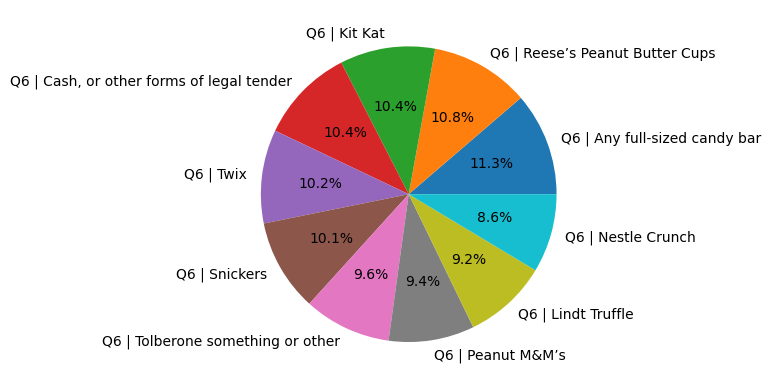

In [691]:
# PIE chart for the most 10 'JOY' candies
plt.pie(the_most_10_joy, labels=the_most_10_joy.index ,autopct='%1.1f%%')
plt.show()

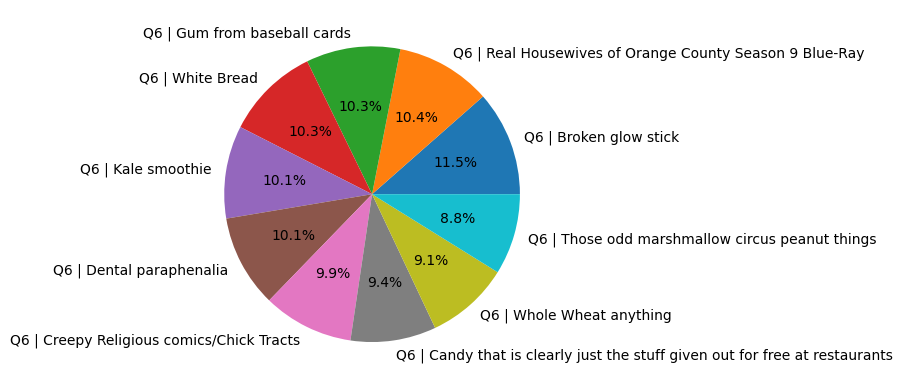

In [692]:
# PIE chart for the most 10 'DESPAIR' candies
plt.pie(the_most_10_des, labels=the_most_10_des.index ,autopct='%1.1f%%')
plt.show()